## Importando as bibliotecas necessarias

In [6]:
import pandas as pd
import numpy as np

In [5]:
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.utils import class_weight, resample
from keras.utils import to_categorical
from keras.metrics import Precision, Recall
from keras import Model

## Importando os datasets

In [8]:
normal_df = pd.read_csv('C:\\Users\\lolfa\\OneDrive\\Área de Trabalho\\ECG\\ptbdb_normal.csv', header=None)
unormal_df = pd.read_csv('C:\\Users\\lolfa\\OneDrive\\Área de Trabalho\\ECG\\ptbdb_abnormal.csv', header=None)

### Tamanho de cada dataset

In [9]:
len(normal_df)

4046

In [10]:
len(unormal_df)

10506

### Concatenando os datasets

In [16]:
df = pd.concat([normal_df, unormal_df])

In [17]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Grafico de pizza das classes

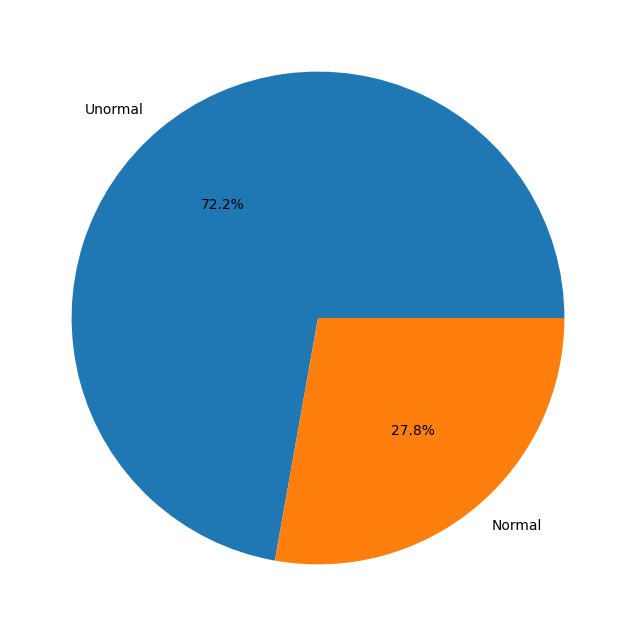

In [21]:
classes = df.iloc[:,187].value_counts()
plt.figure(figsize=(8,8))
plt.pie(classes, labels=['Unormal', 'Normal'], autopct='%1.1f%%')
plt.show()

## Comparacao entre pulsos

Text(0.5, 1.0, 'UNormal')

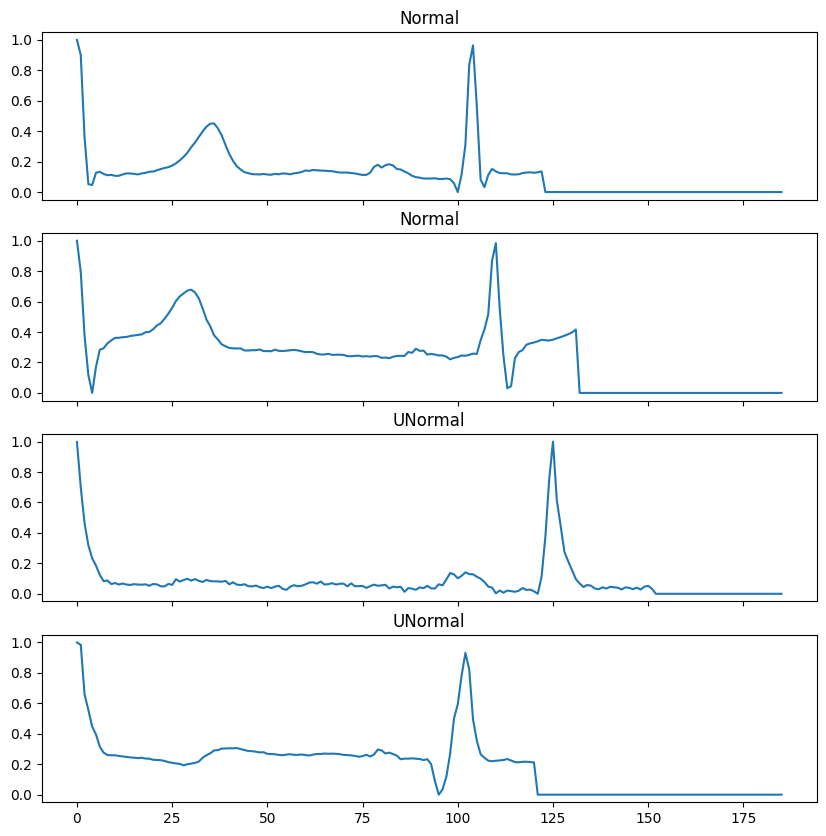

In [23]:
fig, ax = plt.subplots(4, sharex=True, sharey=True)
fig.set_size_inches(10,10)
ax[0].plot(df.iloc[0,:186])
ax[0].set_title("Normal")
ax[1].plot(df.iloc[1,:186])
ax[1].set_title("Normal")
ax[2].plot(df.iloc[-1,:186])
ax[2].set_title("UNormal")
ax[3].plot(df.iloc[-2,:186])
ax[3].set_title("UNormal")

## Dividindo dados de treino e teste

In [29]:
X = df.iloc[:,:186]
y = df.iloc[:,-1]
trax, tesx, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=42,stratify=y)

In [30]:
X_train = trax.values.reshape(len(trax), trax.shape[1],1)
X_test = tesx.values.reshape(len(tesx), tesx.shape[1],1)

## Criando o modelo

In [31]:
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization,MultiHeadAttention,GlobalAveragePooling1D,LayerNormalization,Input
from keras.models import Sequential

In [33]:
cnn = Sequential([
    Conv1D(512,3,input_shape=(X_train.shape[1],1), activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Conv1D(128,3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Conv1D(64,2, activation='relu'),
    BatchNormalization(),
    Conv1D(32,2, activation='selu'),
    GlobalAveragePooling1D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
    
])

In [34]:
cnn.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy',Precision(),Recall()])

In [36]:
cnn.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=.2)

Epoch 1/100
255/255 [==============================] - 18s 65ms/step - loss: 0.3930 - accuracy: 0.8228 - precision: 0.8479 - recall: 0.9185 - val_loss: 1.0303 - val_accuracy: 0.7316 - val_precision: 0.7316 - val_recall: 1.0000
Epoch 2/100
255/255 [==============================] - 17s 67ms/step - loss: 0.2899 - accuracy: 0.8818 - precision: 0.9056 - recall: 0.9330 - val_loss: 1.3309 - val_accuracy: 0.7316 - val_precision: 0.7316 - val_recall: 1.0000
Epoch 3/100
255/255 [==============================] - 16s 64ms/step - loss: 0.2537 - accuracy: 0.9008 - precision: 0.9154 - recall: 0.9500 - val_loss: 2.7870 - val_accuracy: 0.4323 - val_precision: 0.9855 - val_recall: 0.2274
Epoch 4/100
255/255 [==============================] - 17s 66ms/step - loss: 0.2245 - accuracy: 0.9129 - precision: 0.9243 - recall: 0.9574 - val_loss: 0.9844 - val_accuracy: 0.6595 - val_precision: 0.9575 - val_recall: 0.5594
Epoch 5/100
255/255 [==============================] - 16s 63ms/step - loss: 0.1856 - accura

In [37]:
scores = cnn.evaluate(X_test, y_test)

137/137 [==============================] - 2s 11ms/step - loss: 0.2782 - accuracy: 0.9256 - precision: 0.9221 - recall: 0.9797
